# Team

Kelompok 6 (Coldplay):
1. Adel Nor Muhammad
2. Annisa Rahma Melyanta
3. Muhammad Ali Akbar
4. Zulfi Jauharul Ikhsan

# Pengenalan Dataset

- Dataset ini berisi tentang informasi pemesanan antara dua hotel, yaitu city hotel dan resort hotel dari tahun 2015 hingga tahun 2017.
- Data ini terdiri dari 56.707 baris dan 32 kolom.
- Data mencakup informasi seperti saat pemesanan dibuat, lama menginap, jumlah orang dewasa, anak-anak, dan/atau bayi, dan jumlah tempat parkir yang tersedia, dan lain-lain.
- Tujuan dari mengetahui informasi tersebut adalah untuk dapat mengetahui insight seputar pemesanan hotel.

# Info Dataset

1. hotel: tipe hotel
  - Resort Hotel
  - City Hotel
2. is_canceled: apakah pesanan dibatalkan 
  - 1: ya dibatalkan
  - 0: tidak dibatalkan
3. lead_time: jumlah hari antara pesanan dibuat hingga waktu menginap
4. arrival_date_year: tahun menginap
5. arrival_date_month: bulan menginap
6. arrival_date_week_number: minggu menginap
7. arrival_date_day_of_month: tanggal menginap
8. stays_in_weekend_nights: jumlah tamu yang menginap pada akhir pekan
9. stays_in_week_nights: jumlah tamu yang menginap pada hari biasa
10. adults: jumlah orang dewasa yang menginap
11. children: jumlah anak yang menginap
12. babies: jumlah bayi yang menginap
13. meal: jenis makanan yang dipesan
  - Undefined/SC: tanpa paket makanan
  - BB (Bed & Breakfast): tempat tidur & sarapan
  - HB (Half board): sarapan dan satu kali makan lainnya (makan siang / makan malam)
  - FB (Full board): sarapan, makan siang, dan makan malam
14. country: negara asal
15. market_segment: segmen pasar
  - Online TA (Travel Agents)
  - Groups
  - Offline TA/TO (Travel Agents / Tour Operators)
  - Direct
  - Complementary
  - Corporate
  - Aviation
16. distribution_channel: distribusi pemesanan
  - TA/TO (Travel Agents / Tour Operators)
  - Direct
  - Corporate
  - GDS (Global Distribution System)
17. is_repeated_guest: apakah nama pemesanan berasal dari tamu
  - 1: ya 
  - 0: bukan
18. previous_cancellations: jumlah pemesanan yang dibatalkan sebelum pemesanan saat ini
19. previous_bookings_not_canceled: jumlah pemesanan yang tidak dibatalkan sebelum pemesanan saat ini
20. reserved_room_type: kode tipe kamar yang dipesan
21. assigned_room_type: kode tipe kamar yang ditetapkan ketika pemesanan.
22. booking_changes: jumlah perubahan pada pemesanan 
23. deposit_type: jika pelanggan melakukan deposit untuk menjamin pemesanan
  - No Deposit: tidak ada deposit yang dilakukan
  - Non Refund: deposit dilakukan sebesar total biaya menginap
  - Refundable:  deposit dilakukan dengan nilai di bawah total biaya menginap
24. agent: ID agen yang melakukan pemesanan
25. company: ID perusahaan yang melakukan pemesanan
26. days_in_waiting_list: jumlah hari pemesanan dalam daftar tunggu sebelum dikonfirmasi ke pelanggan
27. customer_type: tipe pemesanan
  - Transient-Party
  - Transient
  - Contract
  - Group
28. adr (Average Daily Rate): jumlah semua transaksi penginapan dengan jumlah total malam menginap
29. required_car_parking_spaces: jumlah tempat parkir mobil yang dibutuhkan oleh pelanggan
30. total_of_special_requests: jumlah permintaan khusus yang dibuat oleh pelanggan
31. reservation_status: status terakhir reservasi
  - Check-Out: pelanggan telah keluar
  - No-Show:  pelanggan tidak check-in dan memberi tahu hotel tentang alasannya
  - Canceled: pemesanan dibatalkan oleh pelanggan
32. reservation_status_date: tanggal saat status terakhir ditetapkan

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from statsmodels.stats.weightstats import ztest

# Import File

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read File

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DS11/hotel_bookings.csv')
# Memfilter dataset hanya pada tahun 2016, karena hanya tahun 2016 yang memiliki bulan lengkap dari Januari - Desember
data = data.loc[(data['arrival_date_year'] == 2016)] 
data.head()

hotel  is_canceled  lead_time  arrival_date_year  \
3738  Resort Hotel            0        109               2016   
3739  Resort Hotel            0        109               2016   
3740  Resort Hotel            1          2               2016   
3741  Resort Hotel            0         88               2016   
3742  Resort Hotel            1         20               2016   

     arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
3738            January                         1                          1   
3739            January                         1                          1   
3740            January                         1                          1   
3741            January                         1                          1   
3742            January                         1                          1   

      stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
3738                        0                     1       2  ...   
3739                        0                     1       2  ...   
3740                        0                     1       2  ...   
3741                        0                     2       2  ...   
3742                        0                     2       2  ...   

      deposit_type  agent company days_in_waiting_list    customer_type  \
3738    No Deposit  240.0     NaN                    0  Transient-Party   
3739    No Deposit  240.0     NaN                    0  Transient-Party   
3740    No Deposit  240.0     NaN                    0        Transient   
3741    No Deposit  241.0     NaN                    0        Transient   
3742    No Deposit  240.0     NaN                    0        Transient   

         adr  required_car_parking_spaces  total_of_special_requests  \
3738   59.94                            0                          1   
3739  116.10                            1                          1   
3740   89.00                            0                          1   
3741   73.46                            0                          2   
3742  119.00                            0                          0   

      reservation_status reservation_status_date  
3738           Check-Out              2016-01-02  
3739           Check-Out              2016-01-02  
3740             No-Show              2016-01-01  
3741           Check-Out              2016-01-03  
3742            Canceled              2015-12-22  

[5 rows x 32 columns]

# Data Info

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56707 entries, 3738 to 104219
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           56707 non-null  object 
 1   is_canceled                     56707 non-null  int64  
 2   lead_time                       56707 non-null  int64  
 3   arrival_date_year               56707 non-null  int64  
 4   arrival_date_month              56707 non-null  object 
 5   arrival_date_week_number        56707 non-null  int64  
 6   arrival_date_day_of_month       56707 non-null  int64  
 7   stays_in_weekend_nights         56707 non-null  int64  
 8   stays_in_week_nights            56707 non-null  int64  
 9   adults                          56707 non-null  int64  
 10  children                        56707 non-null  float64
 11  babies                          56707 non-null  int64  
 12  meal                        

# Charts

## Bulan dengan pesanan paling banyak

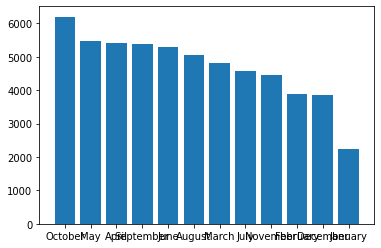

In [ ]:
# Melihat bulan mana yang memiliki pesanan paling banyak
by_month = data.groupby('arrival_date_month').agg(count = ('arrival_date_month','count')).reset_index()
by_month = by_month.sort_values(by=['count'], ascending = False)
plt.bar(by_month['arrival_date_month'],by_month['count'])
plt.show()

## Tingkat pesanan perminggu dalam satu tahun

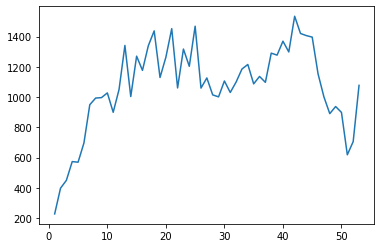

In [ ]:
# Melihat tingkat pesanan perminggu dalam satu tahun
by_week = data.groupby('arrival_date_week_number').agg(count = ('arrival_date_week_number','count')).reset_index()
plt.plot(by_week['arrival_date_week_number'],by_week['count'])
plt.show()

## Perbandingan pesanan resort hotel dan city hotel

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


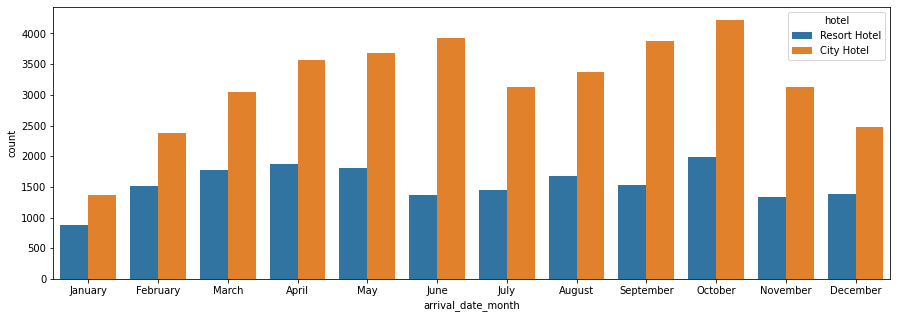

In [ ]:
# Melihat perbandingan pesanan antara resort hotel dan city hotel
plt.subplots(figsize=(15,5))
sns.countplot(data.arrival_date_month,hue=data.hotel)

## Pengunjung dengan transaksi deposit di city hotel

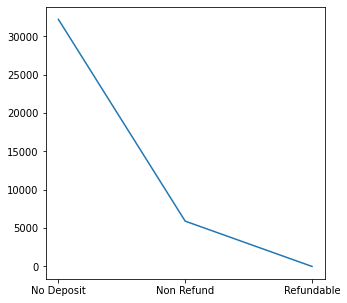

In [ ]:
# Menampilkan jumlah pengunjung yang melakukan jenis transaksi deposit di hotel City Hotel
fig = plt.figure(figsize=(5,5))
city = data[data['hotel']=='City Hotel']
month = city.deposit_type.value_counts(sort=False)
plt.plot(month)
plt.show()

## Pengunjung dengan transaksi deposit di resort hotel

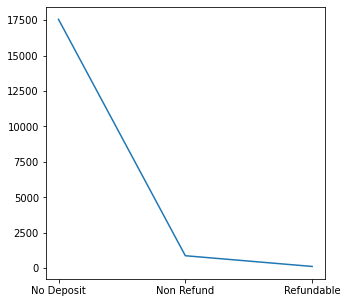

In [ ]:
# Menampilkan jumlah pengunjung yang melakukan jenis transaksi deposit di hotel Resort Hotel
fig = plt.figure(figsize=(5,5))
resort = data[data['hotel']=='Resort Hotel']
month = resort.deposit_type.value_counts(sort=False)
plt.plot(month)
plt.show()

## Perbandingan jumlah city hotel dan resort hotel

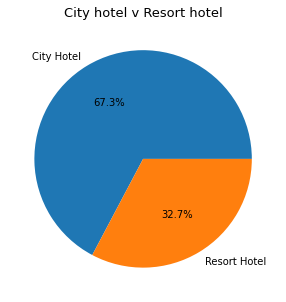

In [ ]:
# Melihat perbandingan Jumlah city hotel vs resort hotel
labels = data.hotel.value_counts().index
sizes = data.hotel.value_counts()
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%');
plt.title('City hotel v Resort hotel',color = 'black',fontsize = 13);
plt.show() 

## Perbandingan pembatalan reservasi berdasrkan tipe hotel

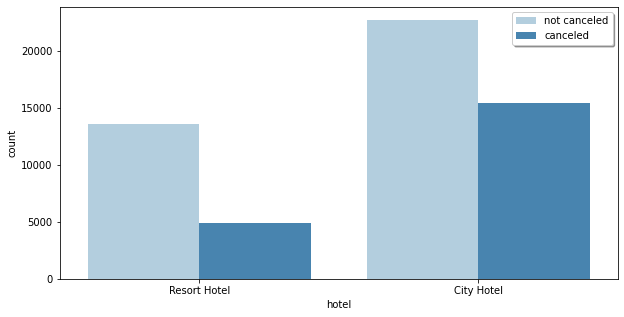

In [ ]:
# Melihat perbandingan pembatalan reservasi berdasrkan Tipe Hotel
plt.figure(figsize=(10,5))
sns.countplot(data=data, x = 'hotel',hue='is_canceled',palette='Blues')
plt.legend(['not canceled','canceled'],shadow = True, loc = 0)
plt.show()

## Sebaran data antara tanggal dan jumlah tamu pada hari biasa

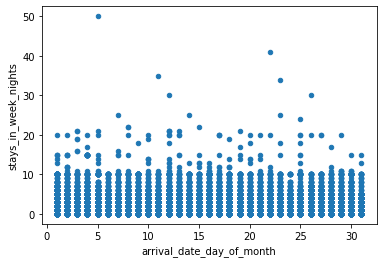

In [ ]:
# Melihat sebaran data antara tanggal menginap dengan jumlah tamu yang menginap pada hari biasa
data.plot.scatter(x='arrival_date_day_of_month', y='stays_in_week_nights')

## Sebaran data antara tanggal dan jumlah tamu pada akhir pekan

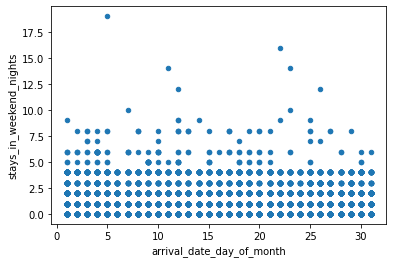

In [ ]:
# Melihat sebaran data antara tanggal menginap dengan jumlah tamu yang menginap pada akhir pekan
data.plot.scatter(x='arrival_date_day_of_month', y='stays_in_weekend_nights')